# Task 2 Understanding ROC and AUC 

## 2a: Create a ROC (with AI assistant/Excel ) 
(Refer to roc_data.csv)
```
Step1: Given the threshold (0.95,0.90,0.85,0.80,0.75,0.70), derive True Positive and False Positive 
Step2: Calculate the True Positive Rate (TPR) and False Positive Rate (FPR), enter the values into the sheet 
Step3: plot the set points (FRP, TPR) on the ROC diagram 
```


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
# Load the dataset
roc_data_path = "roc_data.csv"
roc_df = pd.read_csv(roc_data_path)
roc_df.shape

(150, 6)

In [3]:
roc_df.head()

,ID,Prediction,True_Label,prediction_label,TP,FP
0,1,0.998,1,1,1,0
1,2,0.998,1,1,1,0
2,3,0.998,1,1,1,0
3,4,0.997,1,1,1,0
4,5,0.997,1,1,1,0


Step1: Given the threshold (0.95,0.90,0.85,0.80,0.75,0.70), derive True Positive and False Positive 

Step2: Calculate the True Positive Rate (TPR) and False Positive Rate (FPR), enter the values into the sheet 

In [4]:
# Define thresholds given in the problem
thresholds = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70]

# Compute TPR and FPR for each threshold
tpr_list = []
fpr_list = []

for threshold in thresholds:
    # Apply thresholding
    roc_df['predicted_label'] = (roc_df['Prediction'] >= threshold).astype(int)
    
    # Compute confusion matrix values
    TP = ((roc_df['predicted_label'] == 1) & (roc_df['True_Label'] == 1)).sum()
    FP = ((roc_df['predicted_label'] == 1) & (roc_df['True_Label'] == 0)).sum()
    FN = ((roc_df['predicted_label'] == 0) & (roc_df['True_Label'] == 1)).sum()
    TN = ((roc_df['predicted_label'] == 0) & (roc_df['True_Label'] == 0)).sum()
    
    # Compute TPR and FPR
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)

print(f"tpr_list: {tpr_list}\n")
print(f"fpr_list: {fpr_list}")

tpr_list: [np.float64(0.5416666666666666), np.float64(0.6388888888888888), np.float64(0.7083333333333334), np.float64(0.75), np.float64(0.7638888888888888), np.float64(0.8055555555555556)]

fpr_list: [np.float64(0.05128205128205128), np.float64(0.0641025641025641), np.float64(0.0641025641025641), np.float64(0.0641025641025641), np.float64(0.07692307692307693), np.float64(0.07692307692307693)]


Step3: plot the set points (FRP, TPR) on the ROC diagram 

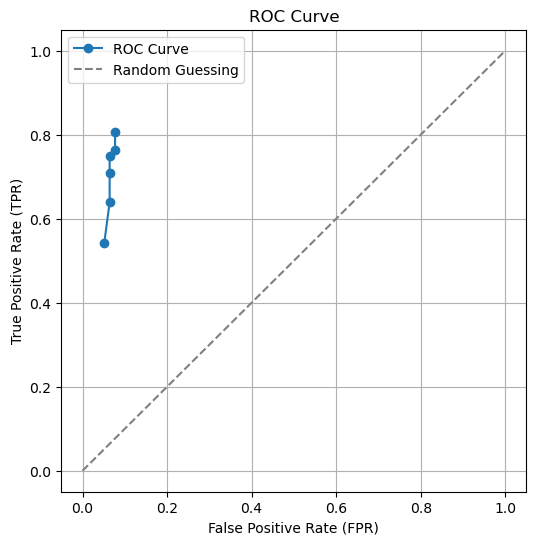

In [5]:
# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_list, tpr_list, marker='o', linestyle='-', label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()

In [6]:
# Compute AUC Score
auc_score = auc(fpr_list, tpr_list)
# Show plot
plt.show()

In [7]:
try:
    from prettytable import PrettyTable
except:
    %pip install prettytable
    from prettytable import PrettyTable

In [8]:
# Display computed TPR and FPR values
roc_results = pd.DataFrame({"Threshold": thresholds, "TPR": tpr_list, "FPR": fpr_list})

table = PrettyTable()
table.field_names = ["Threshold", "TPR", "FPR"]

for i in range(len(roc_results)):
    table.add_row([roc_results["Threshold"][i], roc_results["TPR"][i], roc_results["FPR"][i]])

print(table)


+-----------+--------------------+---------------------+
| Threshold |        TPR         |         FPR         |
+-----------+--------------------+---------------------+
|    0.95   | 0.5416666666666666 | 0.05128205128205128 |
|    0.9    | 0.6388888888888888 |  0.0641025641025641 |
|    0.85   | 0.7083333333333334 |  0.0641025641025641 |
|    0.8    |        0.75        |  0.0641025641025641 |
|    0.75   | 0.7638888888888888 | 0.07692307692307693 |
|    0.7    | 0.8055555555555556 | 0.07692307692307693 |
+-----------+--------------------+---------------------+
